In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path,sep='\t')

In [3]:
data = load_data("marketing_campaign.csv")
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Dataset Description

First lest's have a brief introduction to all attributes in the dataset we use:

##### People

ID: Customer's unique identifier \
Year_Birth: Customer's birth year  
Education: Customer's education level \
Marital_Status: Customer's marital status \
Income: Customer's yearly household income \
Kidhome: Number of children in customer's household \
Teenhome: Number of teenagers in customer's household \
Dt_Customer: Date of customer's enrollment with the company \
Recency: Number of days since customer's last purchase \
Complain: 1 if customer complained in the last 2 years, 0 otherwise 

##### Products

MntWines: Amount spent on wine in last 2 years \
MntFruits: Amount spent on fruits in last 2 years \
MntMeatProducts: Amount spent on meat in last 2 years \
MntFishProducts: Amount spent on fish in last 2 years \
MntSweetProducts: Amount spent on sweets in last 2 years \
MntGoldProds: Amount spent on gold in last 2 years 

##### Promotion

NumDealsPurchases: Number of purchases made with a discount   \
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise \
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise \
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise \
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise \
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise \
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise 

##### Place

NumWebPurchases: Number of purchases made through the company’s web site \
NumCatalogPurchases: Number of purchases made using a catalogue \
NumStorePurchases: Number of purchases made directly in stores \
NumWebVisitsMonth: Number of visits to company’s web site in the last month 

## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 3 'object type' variables - ['Education', 'Marital_Status', 'Dt_Customer'], and the rest are all numerical. So we will need to convert these variables to numeric values

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 NA rows in 'Income' columns, so we fill these NA with the average income of all people

In [6]:
data['Income'].fillna(np.mean(data['Income']), inplace=True)

In [7]:
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


Z_Revenue & Z_CostContact have Constant value, which don't provide any information, so we should drop them. ID also doesn't provide any additional information, so we will drop it as well.

Response - AcceptedCmp5 are all Binary Variables.  

Marital_Status & Education can be seen as Categorical Variable.

Kidhome & Teenhome are Discrete Ordinal Variables, for which have clear orders but not many different values.

The rest 16 variables can be seen as Continuous Ordinal Variables.

In [8]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True) 
data.drop(['ID'], axis=1, inplace=True) 

In [9]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Alone, Adsurd and YOLO are all specific situations of 'Single', so replace all of them with 'Single'

In [10]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd'], 'Single')

In [11]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Education values will remain the same. 

Let's change Dt_Customer values to the number of years particular customer cooperates with the shop.

In [12]:
import datetime

current_year = datetime.date.today().year

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Customming_years'] = 2015 - data['Dt_Customer'].dt.year

data.drop(['Dt_Customer'], axis=1, inplace=True) 

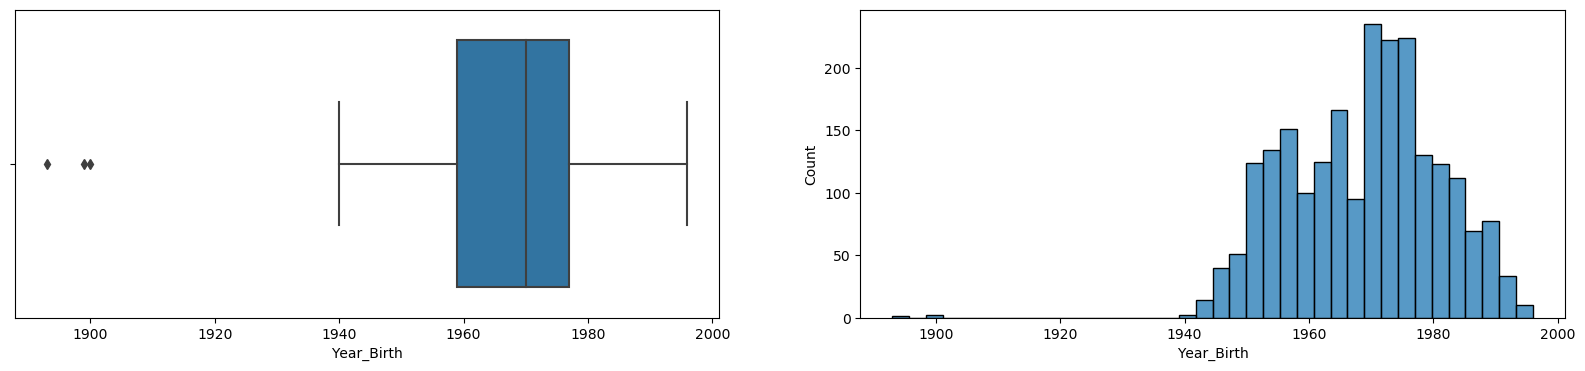

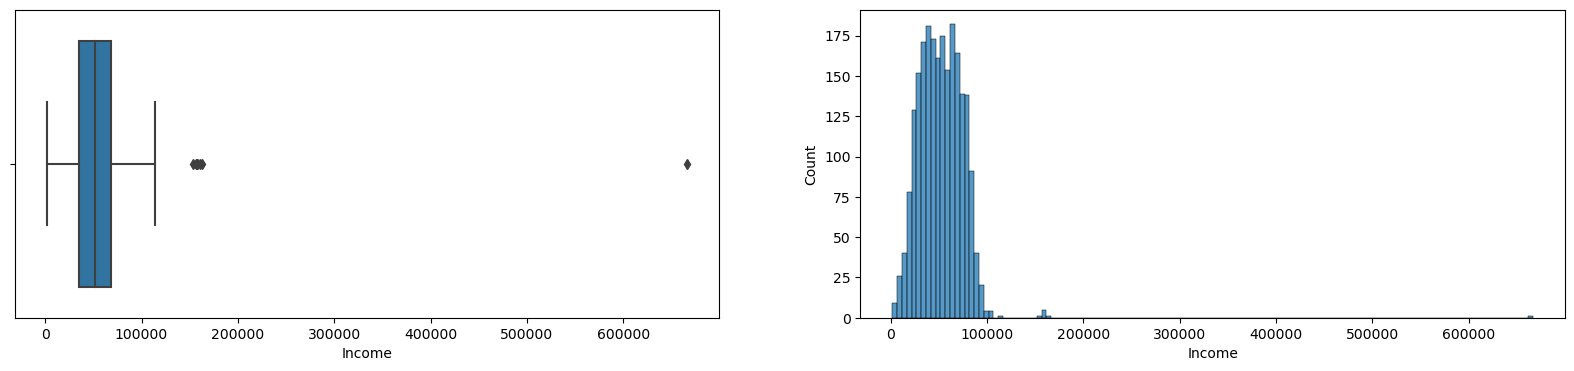

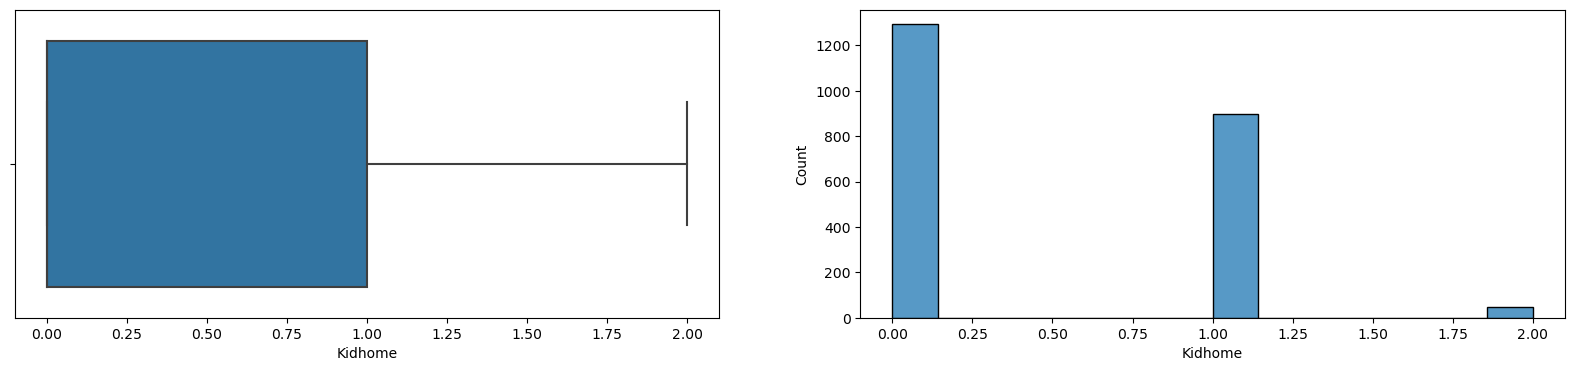

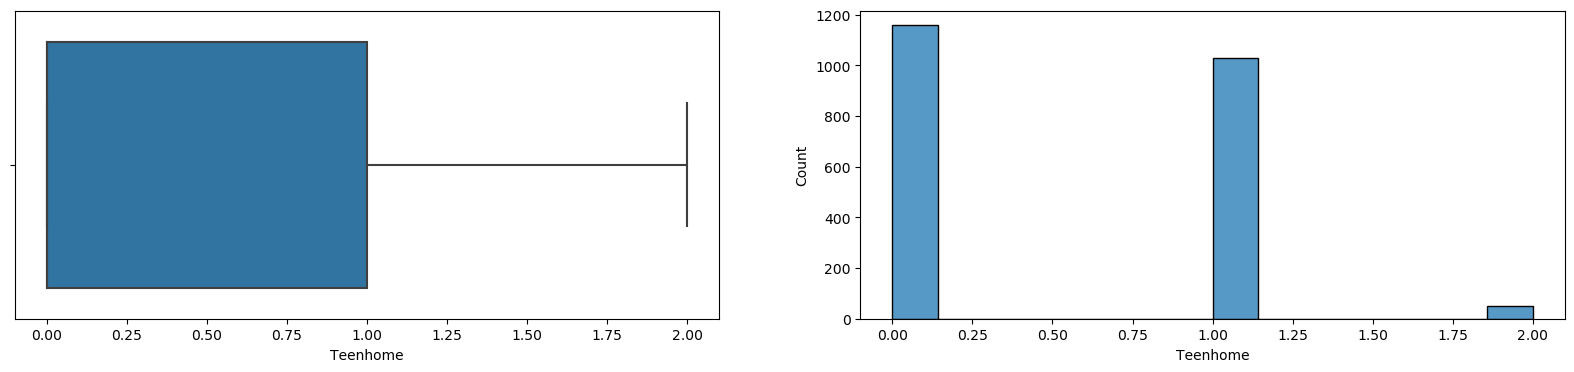

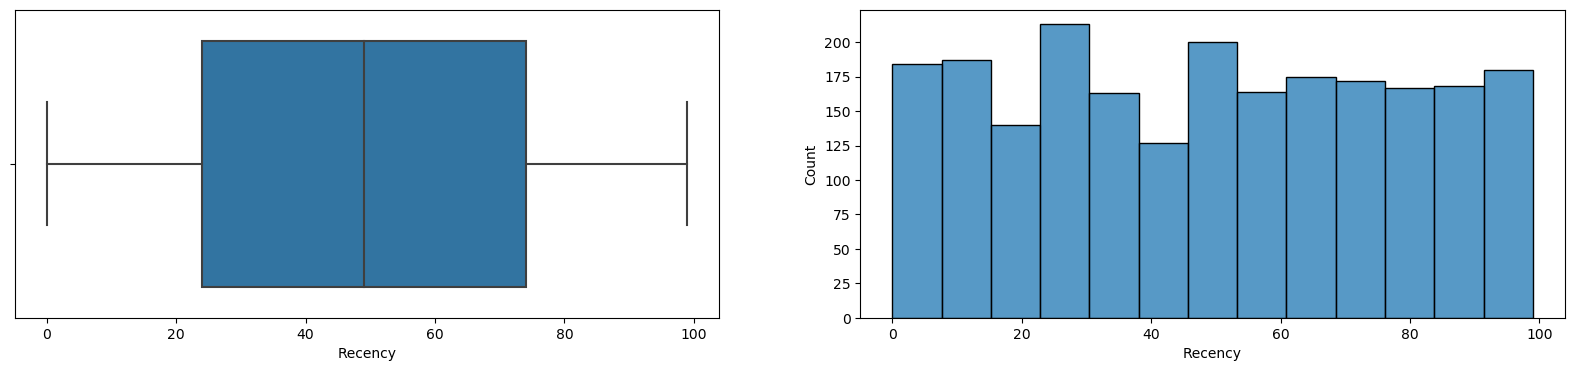

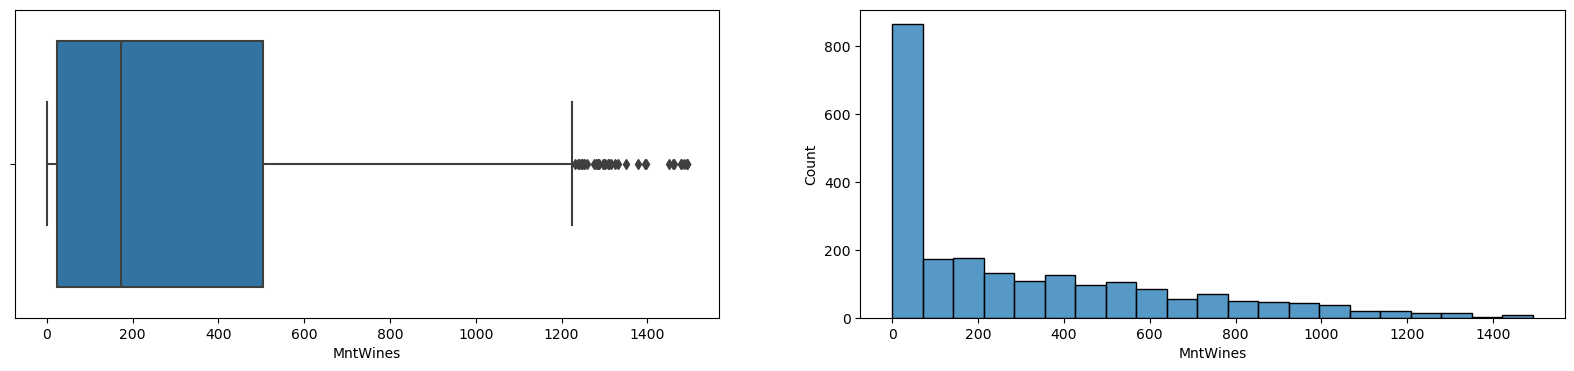

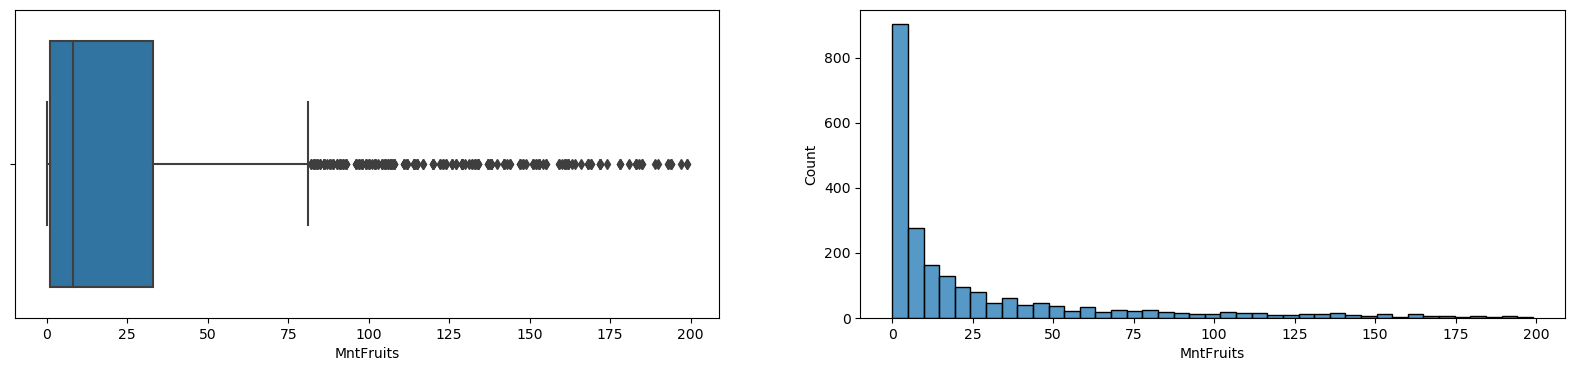

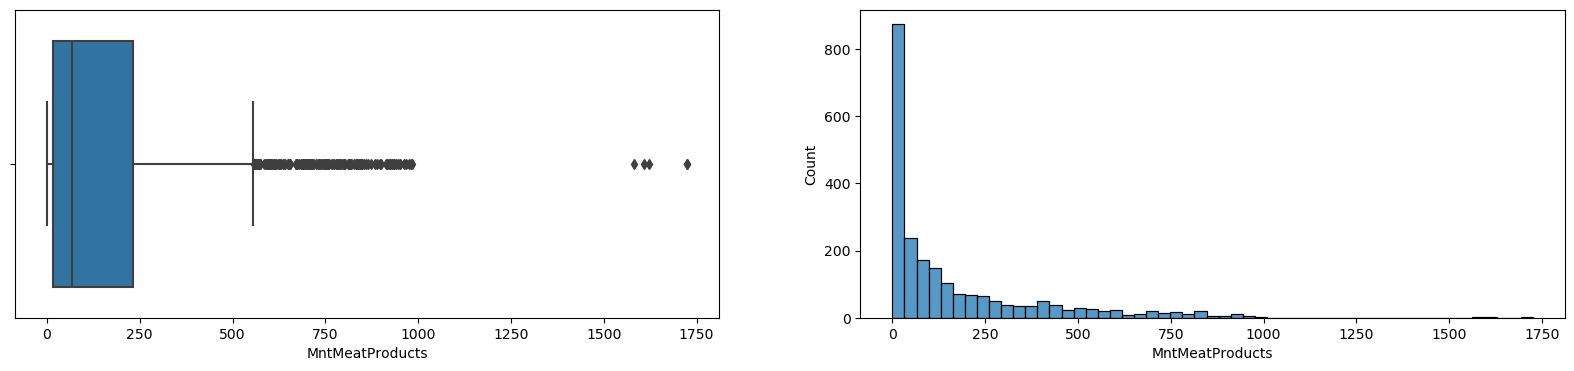

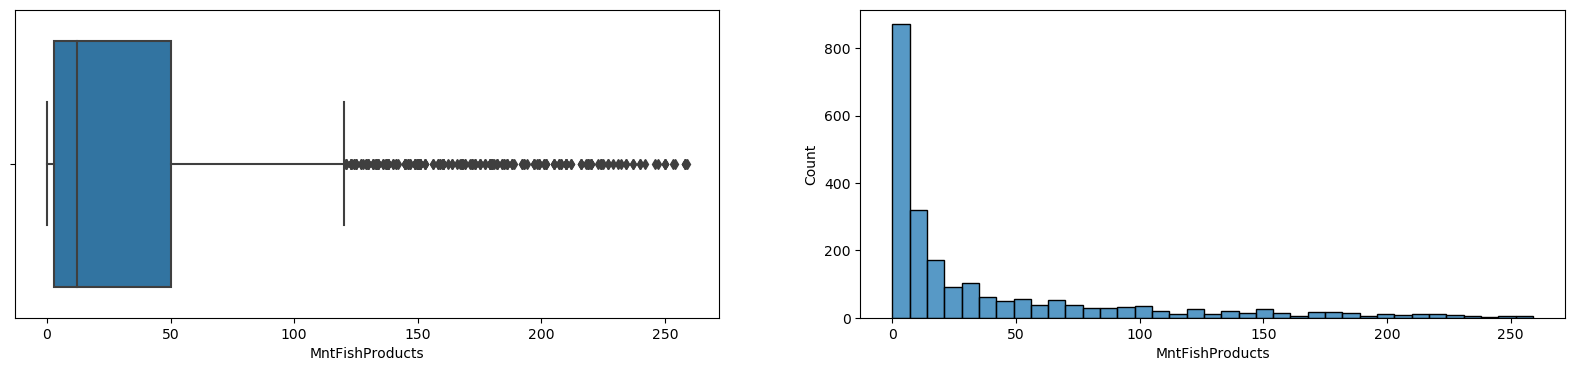

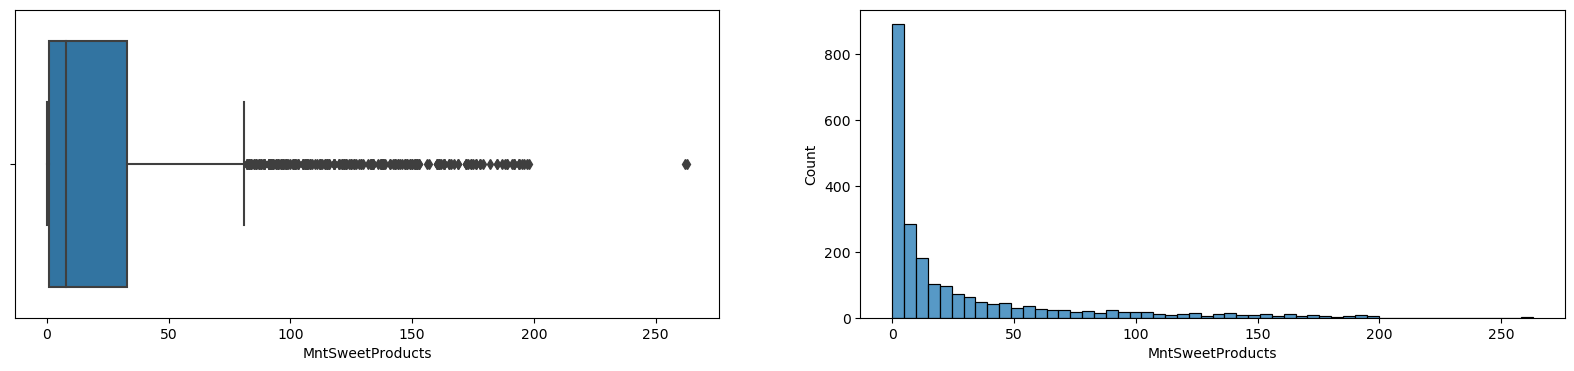

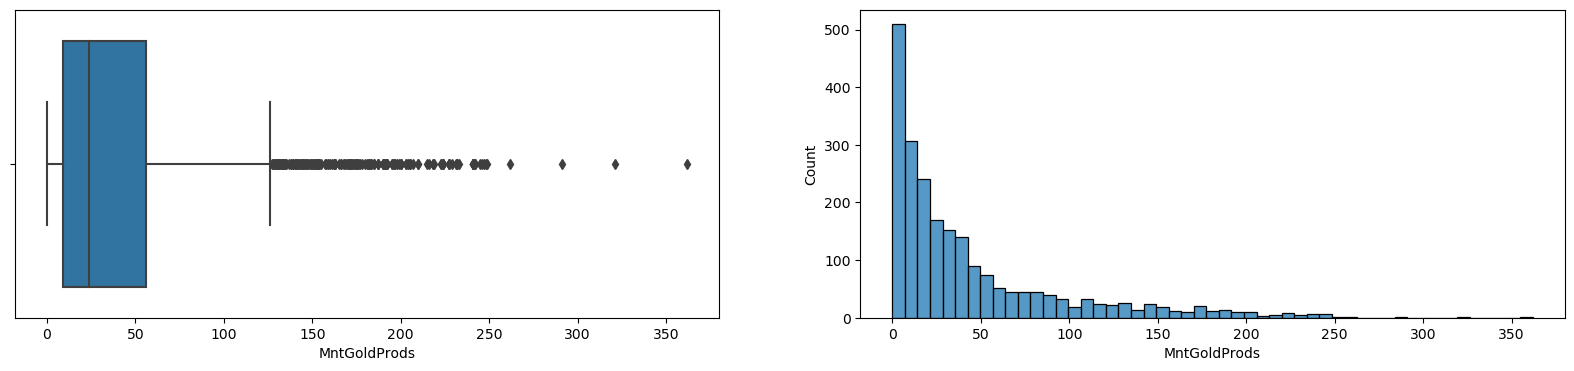

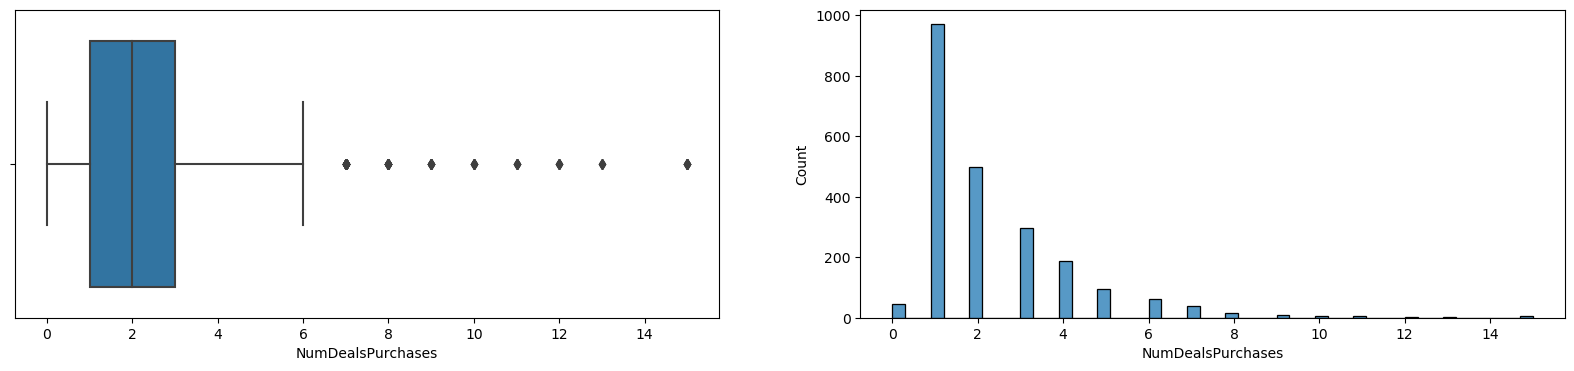

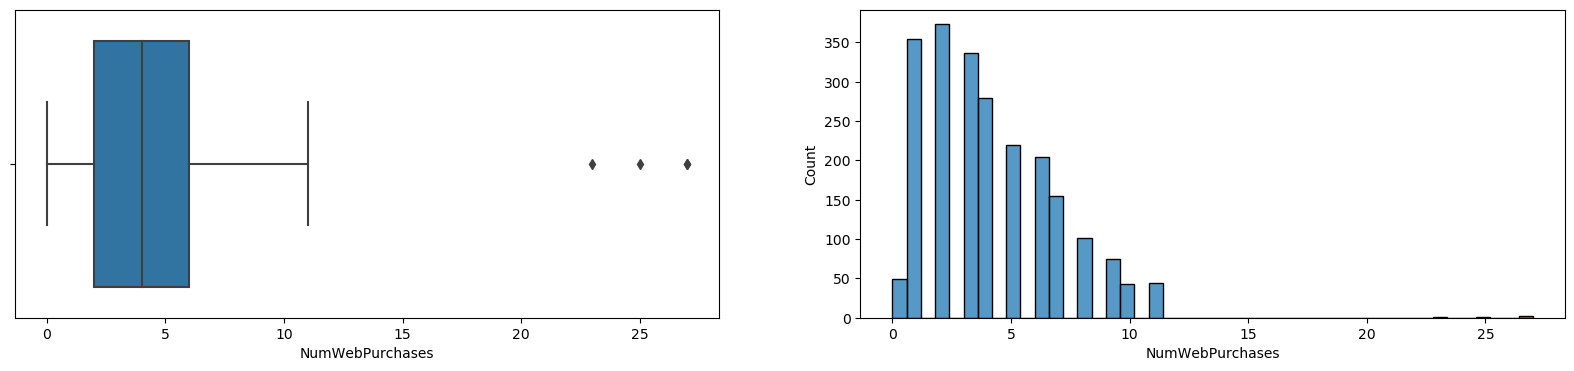

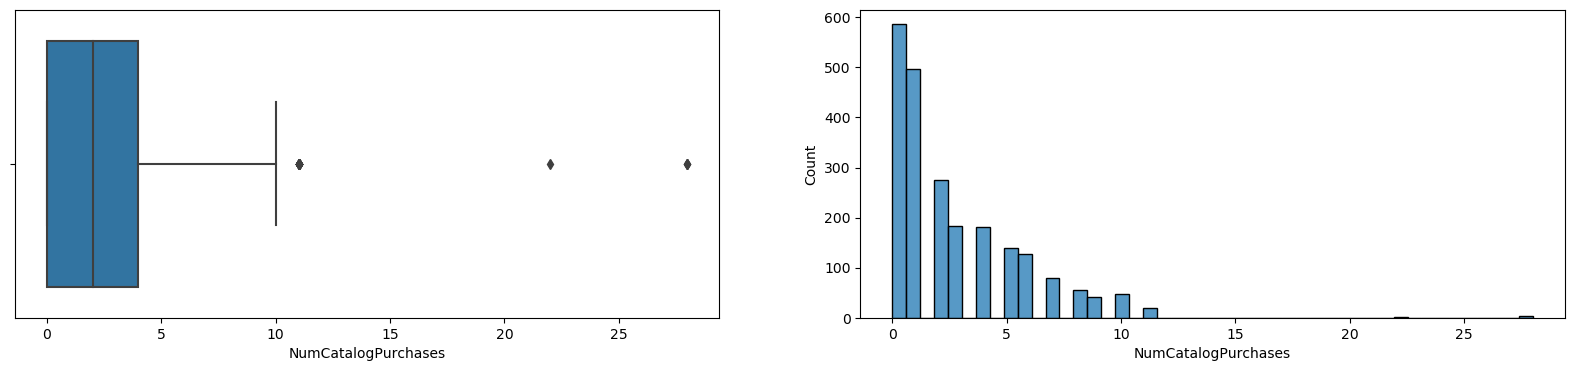

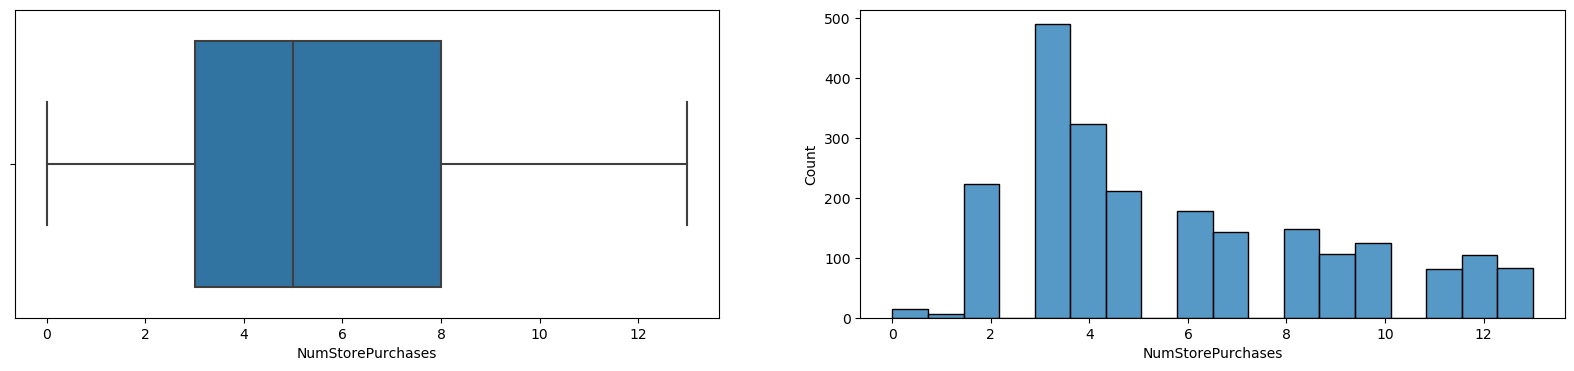

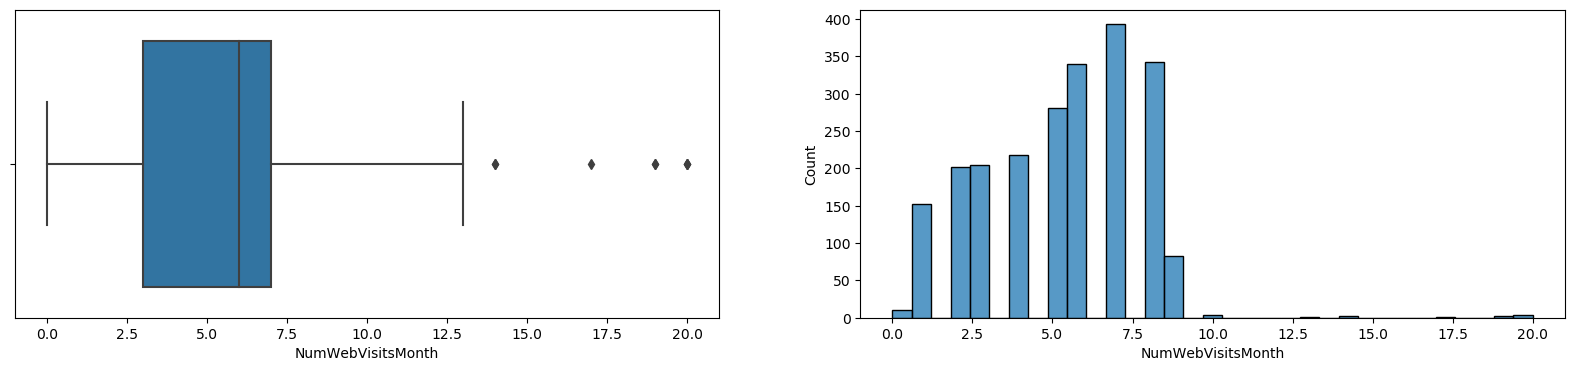

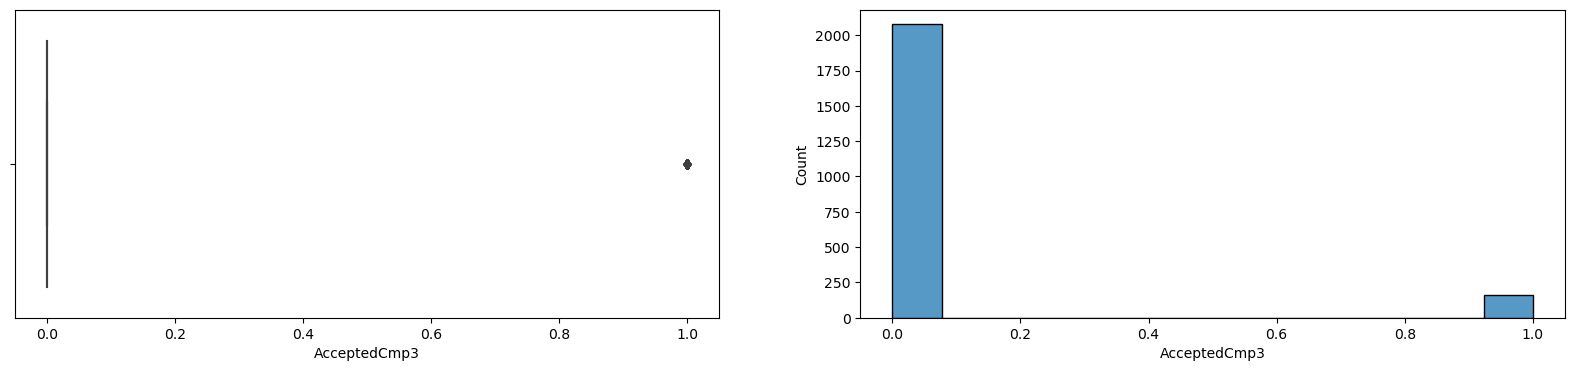

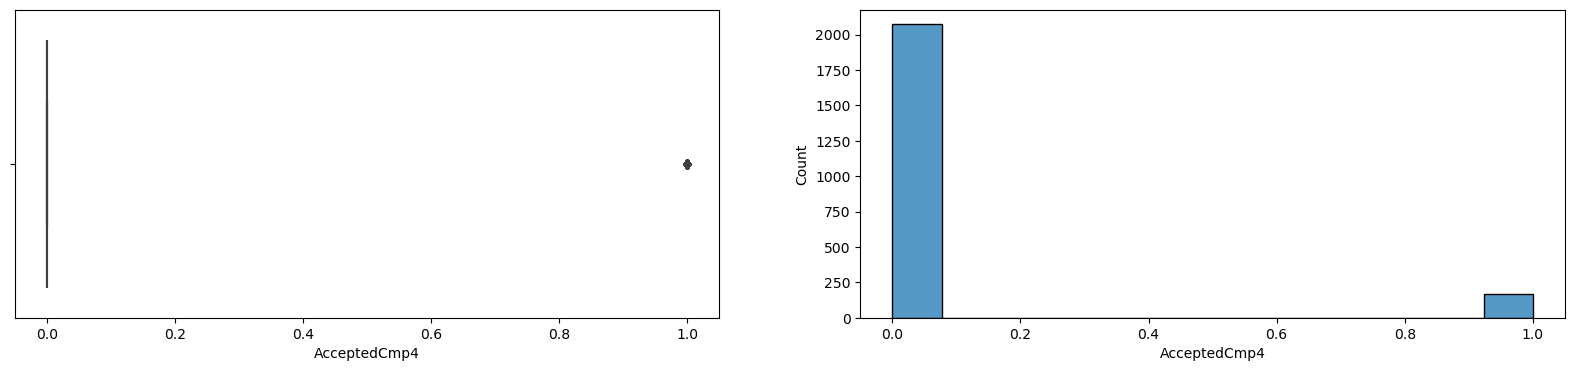

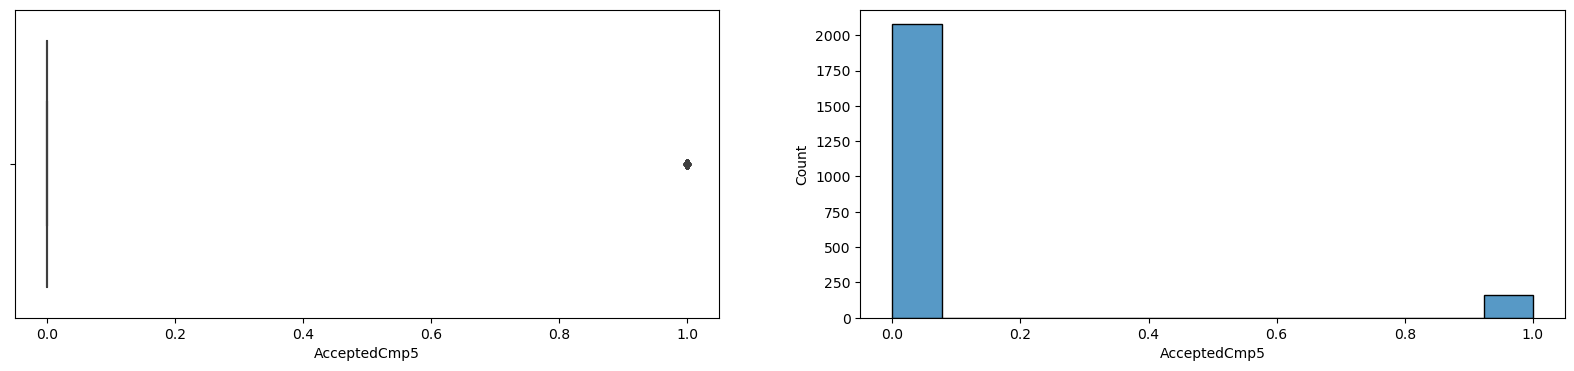

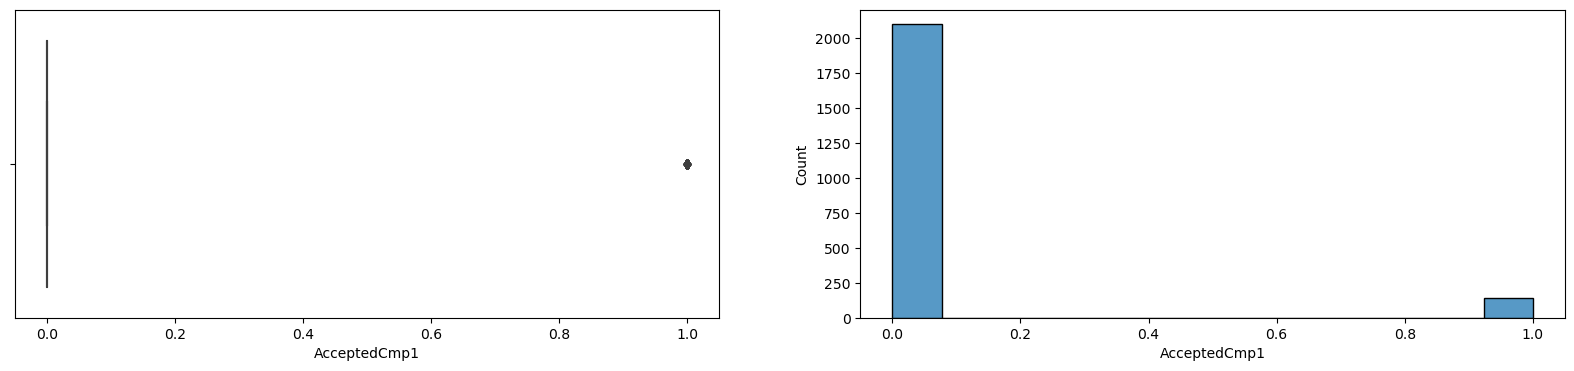

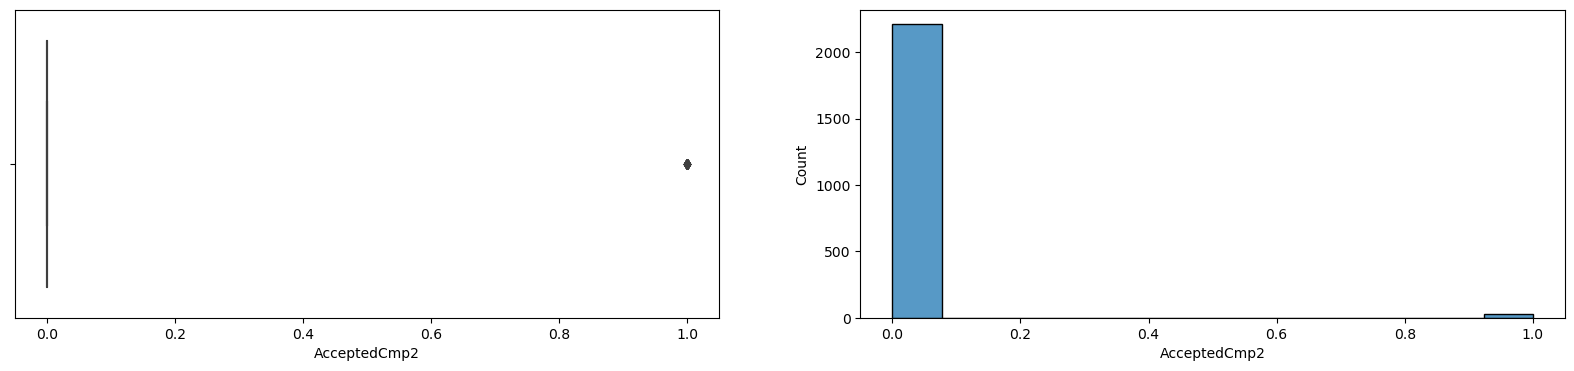

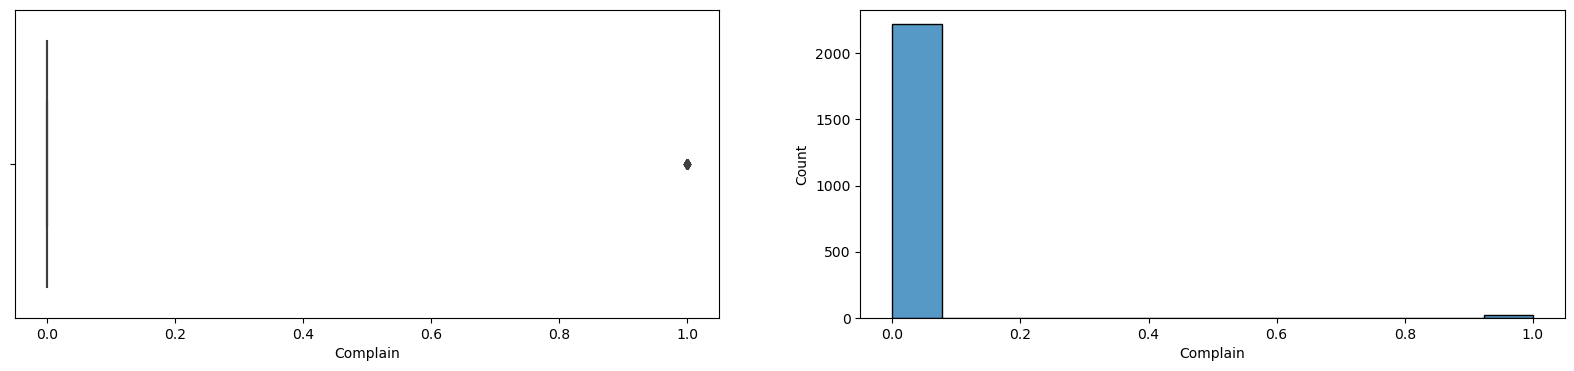

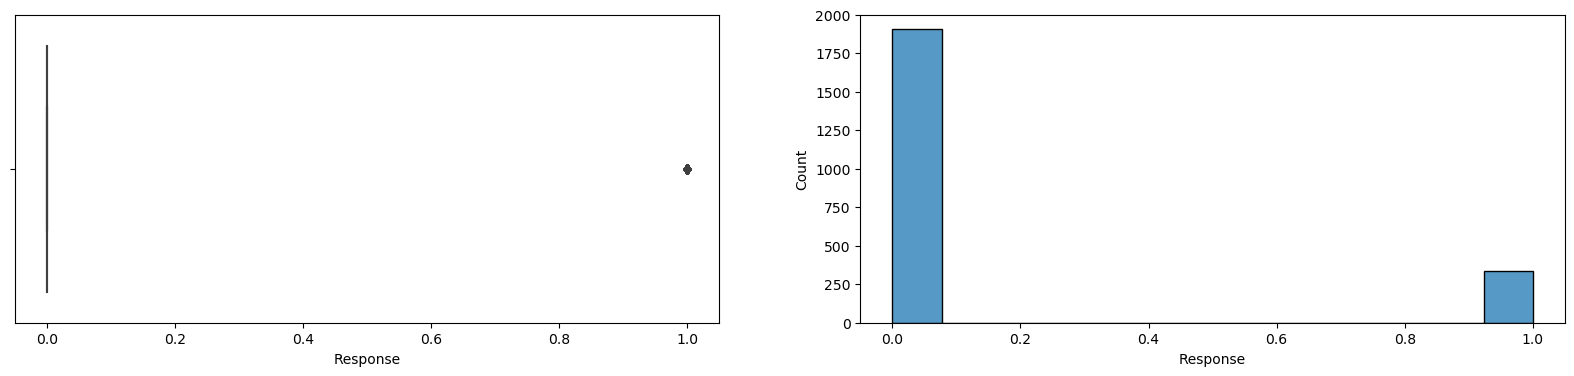

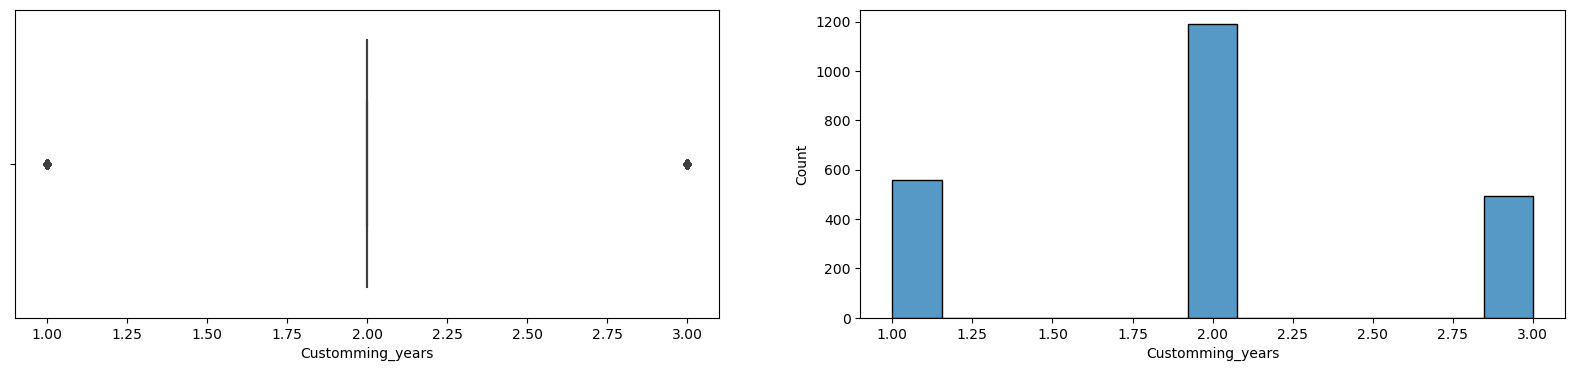

In [13]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

for column_name in numerical_columns:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=data[column_name],data=data)
    plt.subplot(1,2,2)
    sns.histplot(x=data[column_name],data=data)
    plt.show()

We can see some clear outliers in Income and Year of birth. Let's will remove the rows where the Income is greater than 200K and birth year is less than 1920.

In [14]:
data.drop(data[(data['Income']>200000)|(data['Year_Birth']<1920)].index, inplace=True)

Zmienienimy kolumne Year_Birth na kolumne Age

In [15]:
current_year = datetime.date.today().year

data['Age'] = current_year - data.Year_Birth.to_numpy()
data.drop('Year_Birth', axis=1, inplace=True)

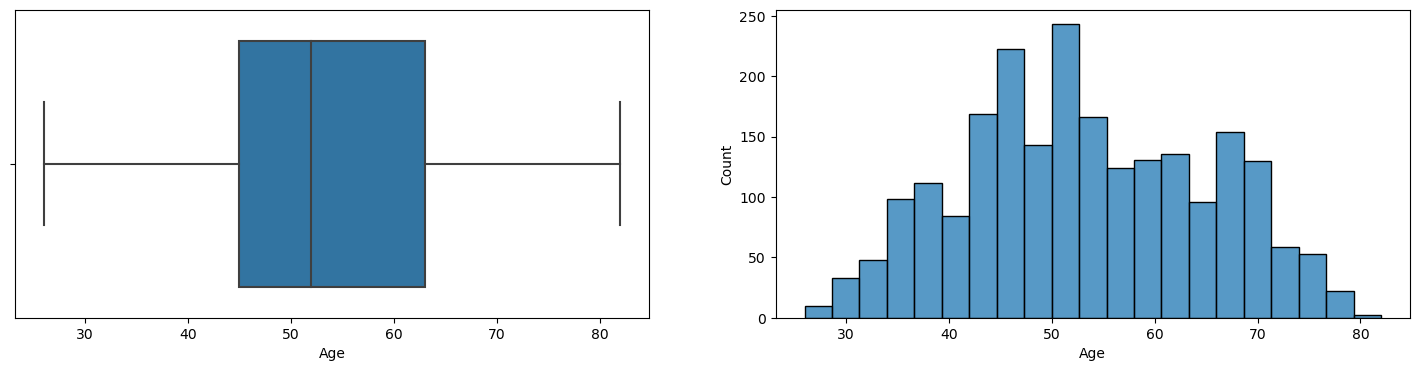

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x=data['Age'],data=data)
plt.subplot(1,2,2)
sns.histplot(x=data['Age'],data=data)
plt.show()

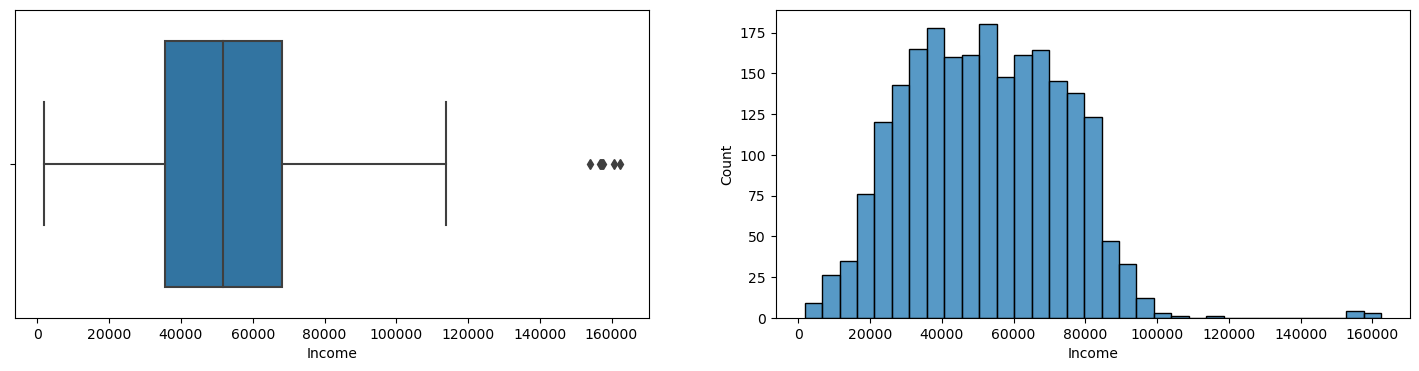

In [17]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x=data['Income'],data=data)
plt.subplot(1,2,2)
sns.histplot(x=data['Income'],data=data)
plt.show()

## Exploretory Data Analysis

The goal of that analysis is to select features for model according to my own intuition

Let's devide the set of columns to categorical and numerical

In [18]:
data.describe(include='object')

,Education,Marital_Status
count,2236,2236
unique,5,5
top,Graduation,Married
freq,1126,864


In [19]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove('Response')
categorical_columns = ['Education', 'Marital_Status']

#### Categorical data

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64


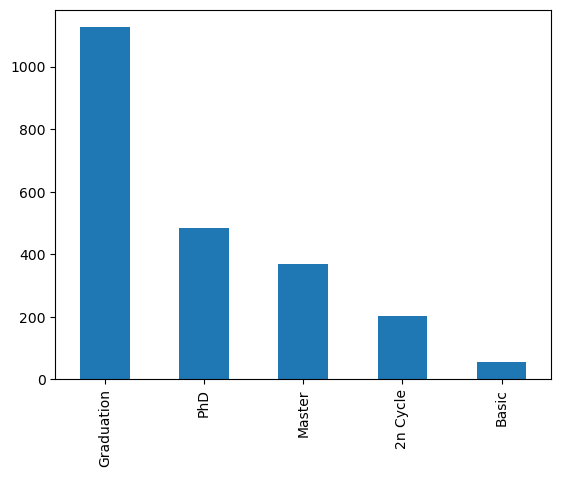

In [20]:
print(data.Education.value_counts())
data.Education.value_counts().plot(kind="bar")

Married     864
Together    578
Single      486
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64


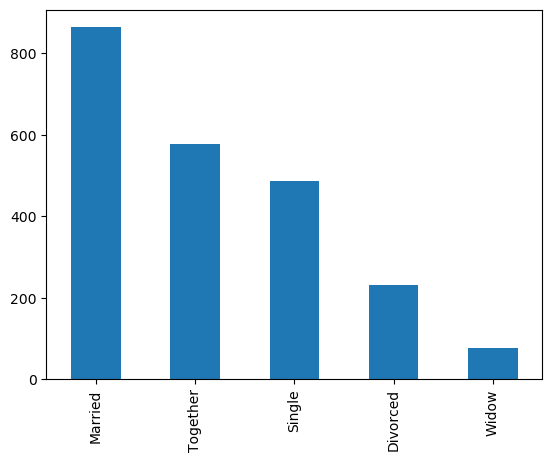

In [21]:
print(data.Marital_Status.value_counts())
data.Marital_Status.value_counts().plot(kind="bar")

Let's check dependencies between categorical data and responce column

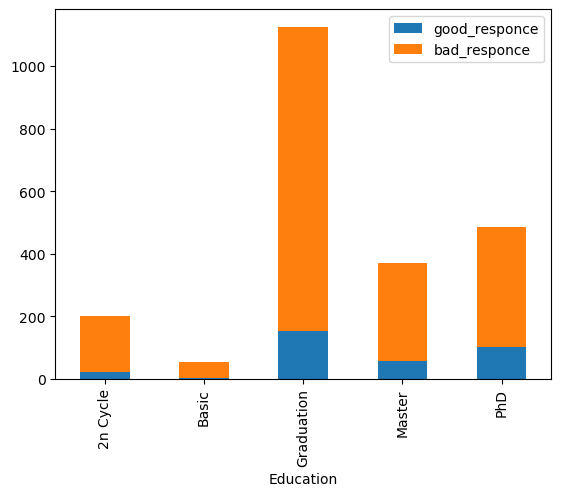

In [22]:
tmp_data = data.copy()
tmp_data['good_responce'] = tmp_data['Response']
tmp_data['bad_responce'] = 1 - tmp_data['Response']
tmp_data.groupby('Education').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

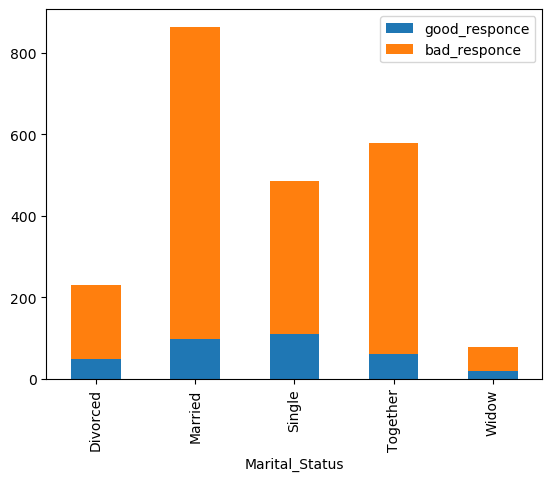

In [23]:
tmp_data.groupby('Marital_Status').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

#### Numerical data

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2236.0,51961.906544,21411.404811,1730.0,35502.5,51684.0,68275.75,162397.0
Kidhome,2236.0,0.444097,0.538459,0.0,0.0,0.0,1.00,2.0
Teenhome,2236.0,0.506708,0.544609,0.0,0.0,0.0,1.00,2.0
Recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
MntWines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
MntFruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
MntMeatProducts,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
MntFishProducts,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0
MntGoldProds,2236.0,43.983005,52.061568,0.0,9.0,24.0,56.00,362.0


Let's check dependencies between categorical data and responce column

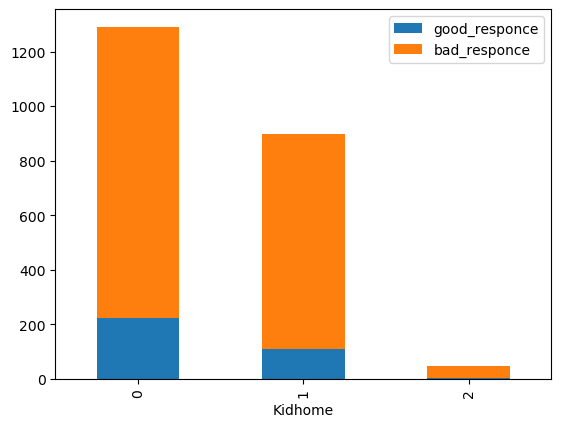

In [25]:
tmp_data.groupby('Kidhome').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

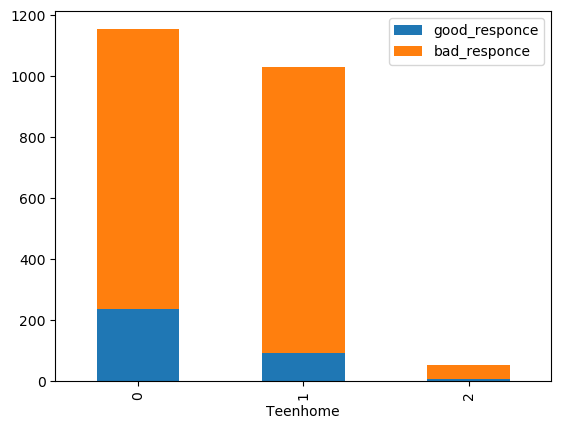

In [26]:
tmp_data.groupby('Teenhome').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

It is clear that number of children in a family affects the possibility of a person to buy new things

### czy nie polaczyć kidhome i teenhome w jedno?

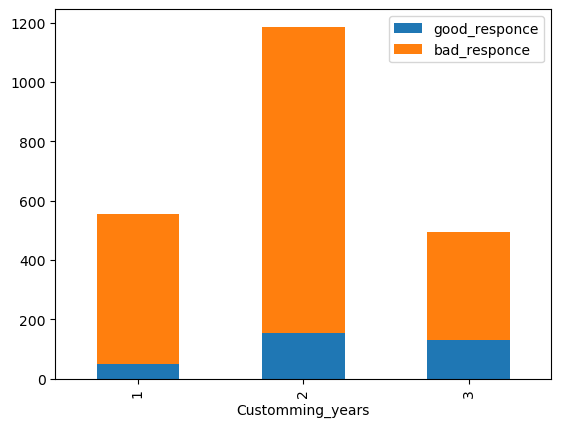

In [27]:
tmp_data.groupby('Customming_years').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

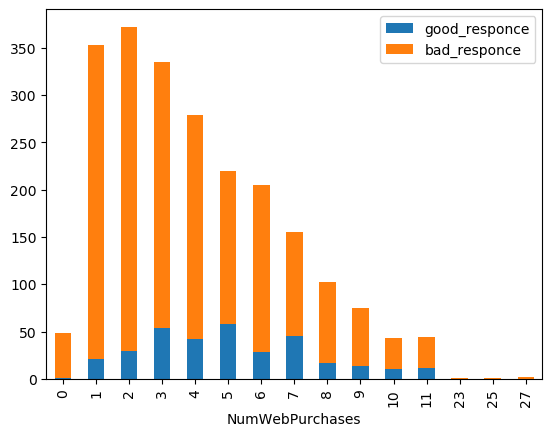

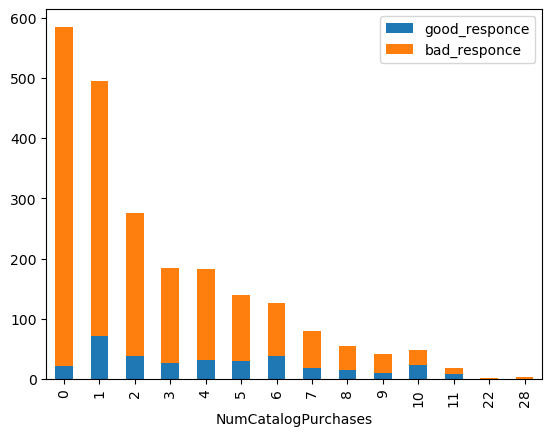

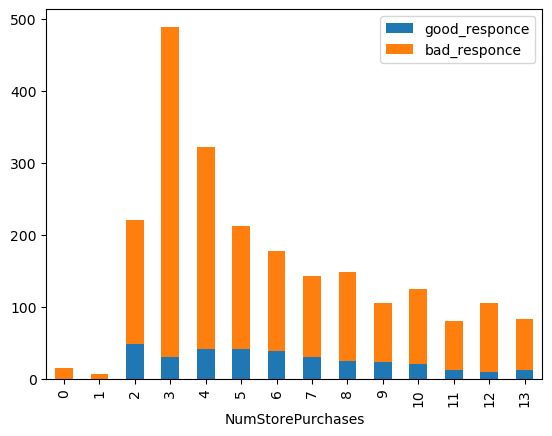

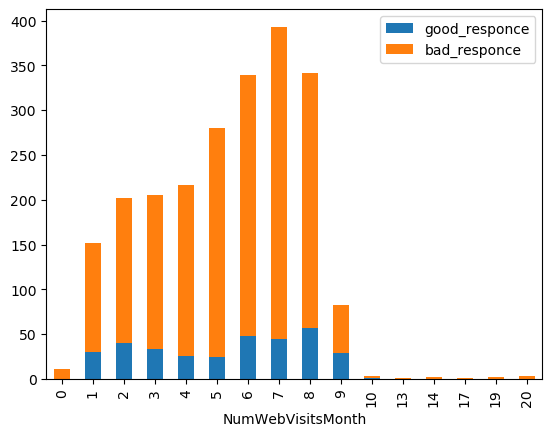

In [28]:
place_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for place_column in place_columns:
    tmp_data.groupby(place_column).agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

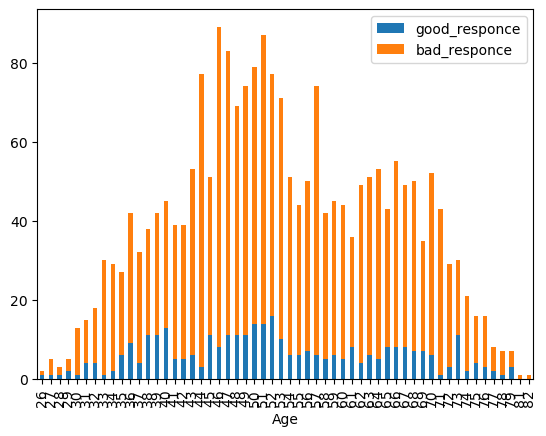

In [29]:
tmp_data.groupby('Age').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

It seems that age doesn not affect responce in our dataset

#### Vizualization of some continuous ordinal variables values

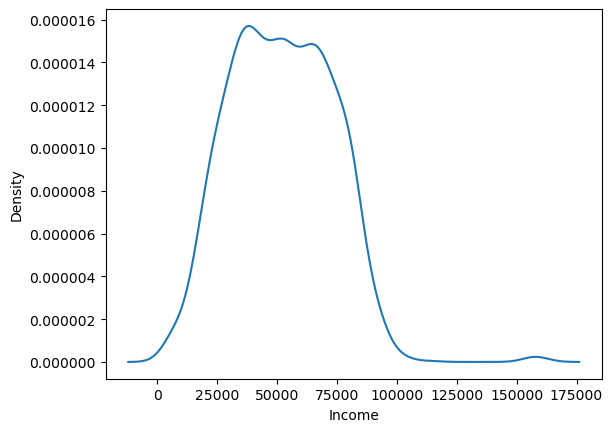

In [30]:
sns.kdeplot(data['Income'])

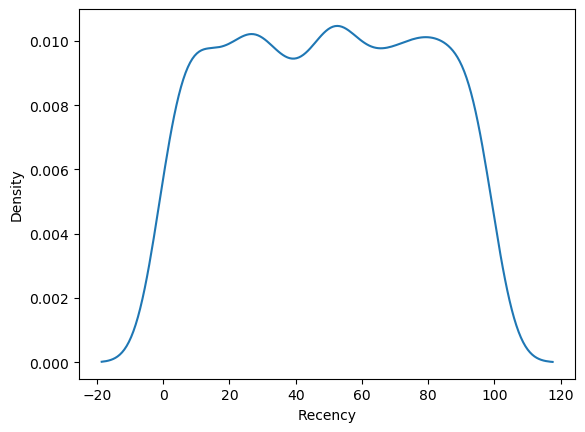

In [31]:
sns.kdeplot(data['Recency'])

Normalization of the numerial fields

In [32]:
def normalize_field(dataset, field_name):
    dataset[field_name] = dataset[field_name] / dataset[field_name].max()
    return dataset

In [33]:
for field in numerical_columns:
    data = normalize_field(data, field)

In [34]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customming_years,Age
0,Graduation,Single,0.357999,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.792683
1,Graduation,Single,0.285375,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.829268
2,Graduation,Together,0.440975,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0,0.666667,0.695122
3,Graduation,Together,0.164079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.463415
4,PhD,Married,0.358954,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0.376996,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.666667,0.670732
2236,PhD,Together,0.394182,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0,0.333333,0.926829
2237,Graduation,Divorced,0.350875,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,...,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0,0.333333,0.500000
2238,Master,Together,0.426393,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,...,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.804878


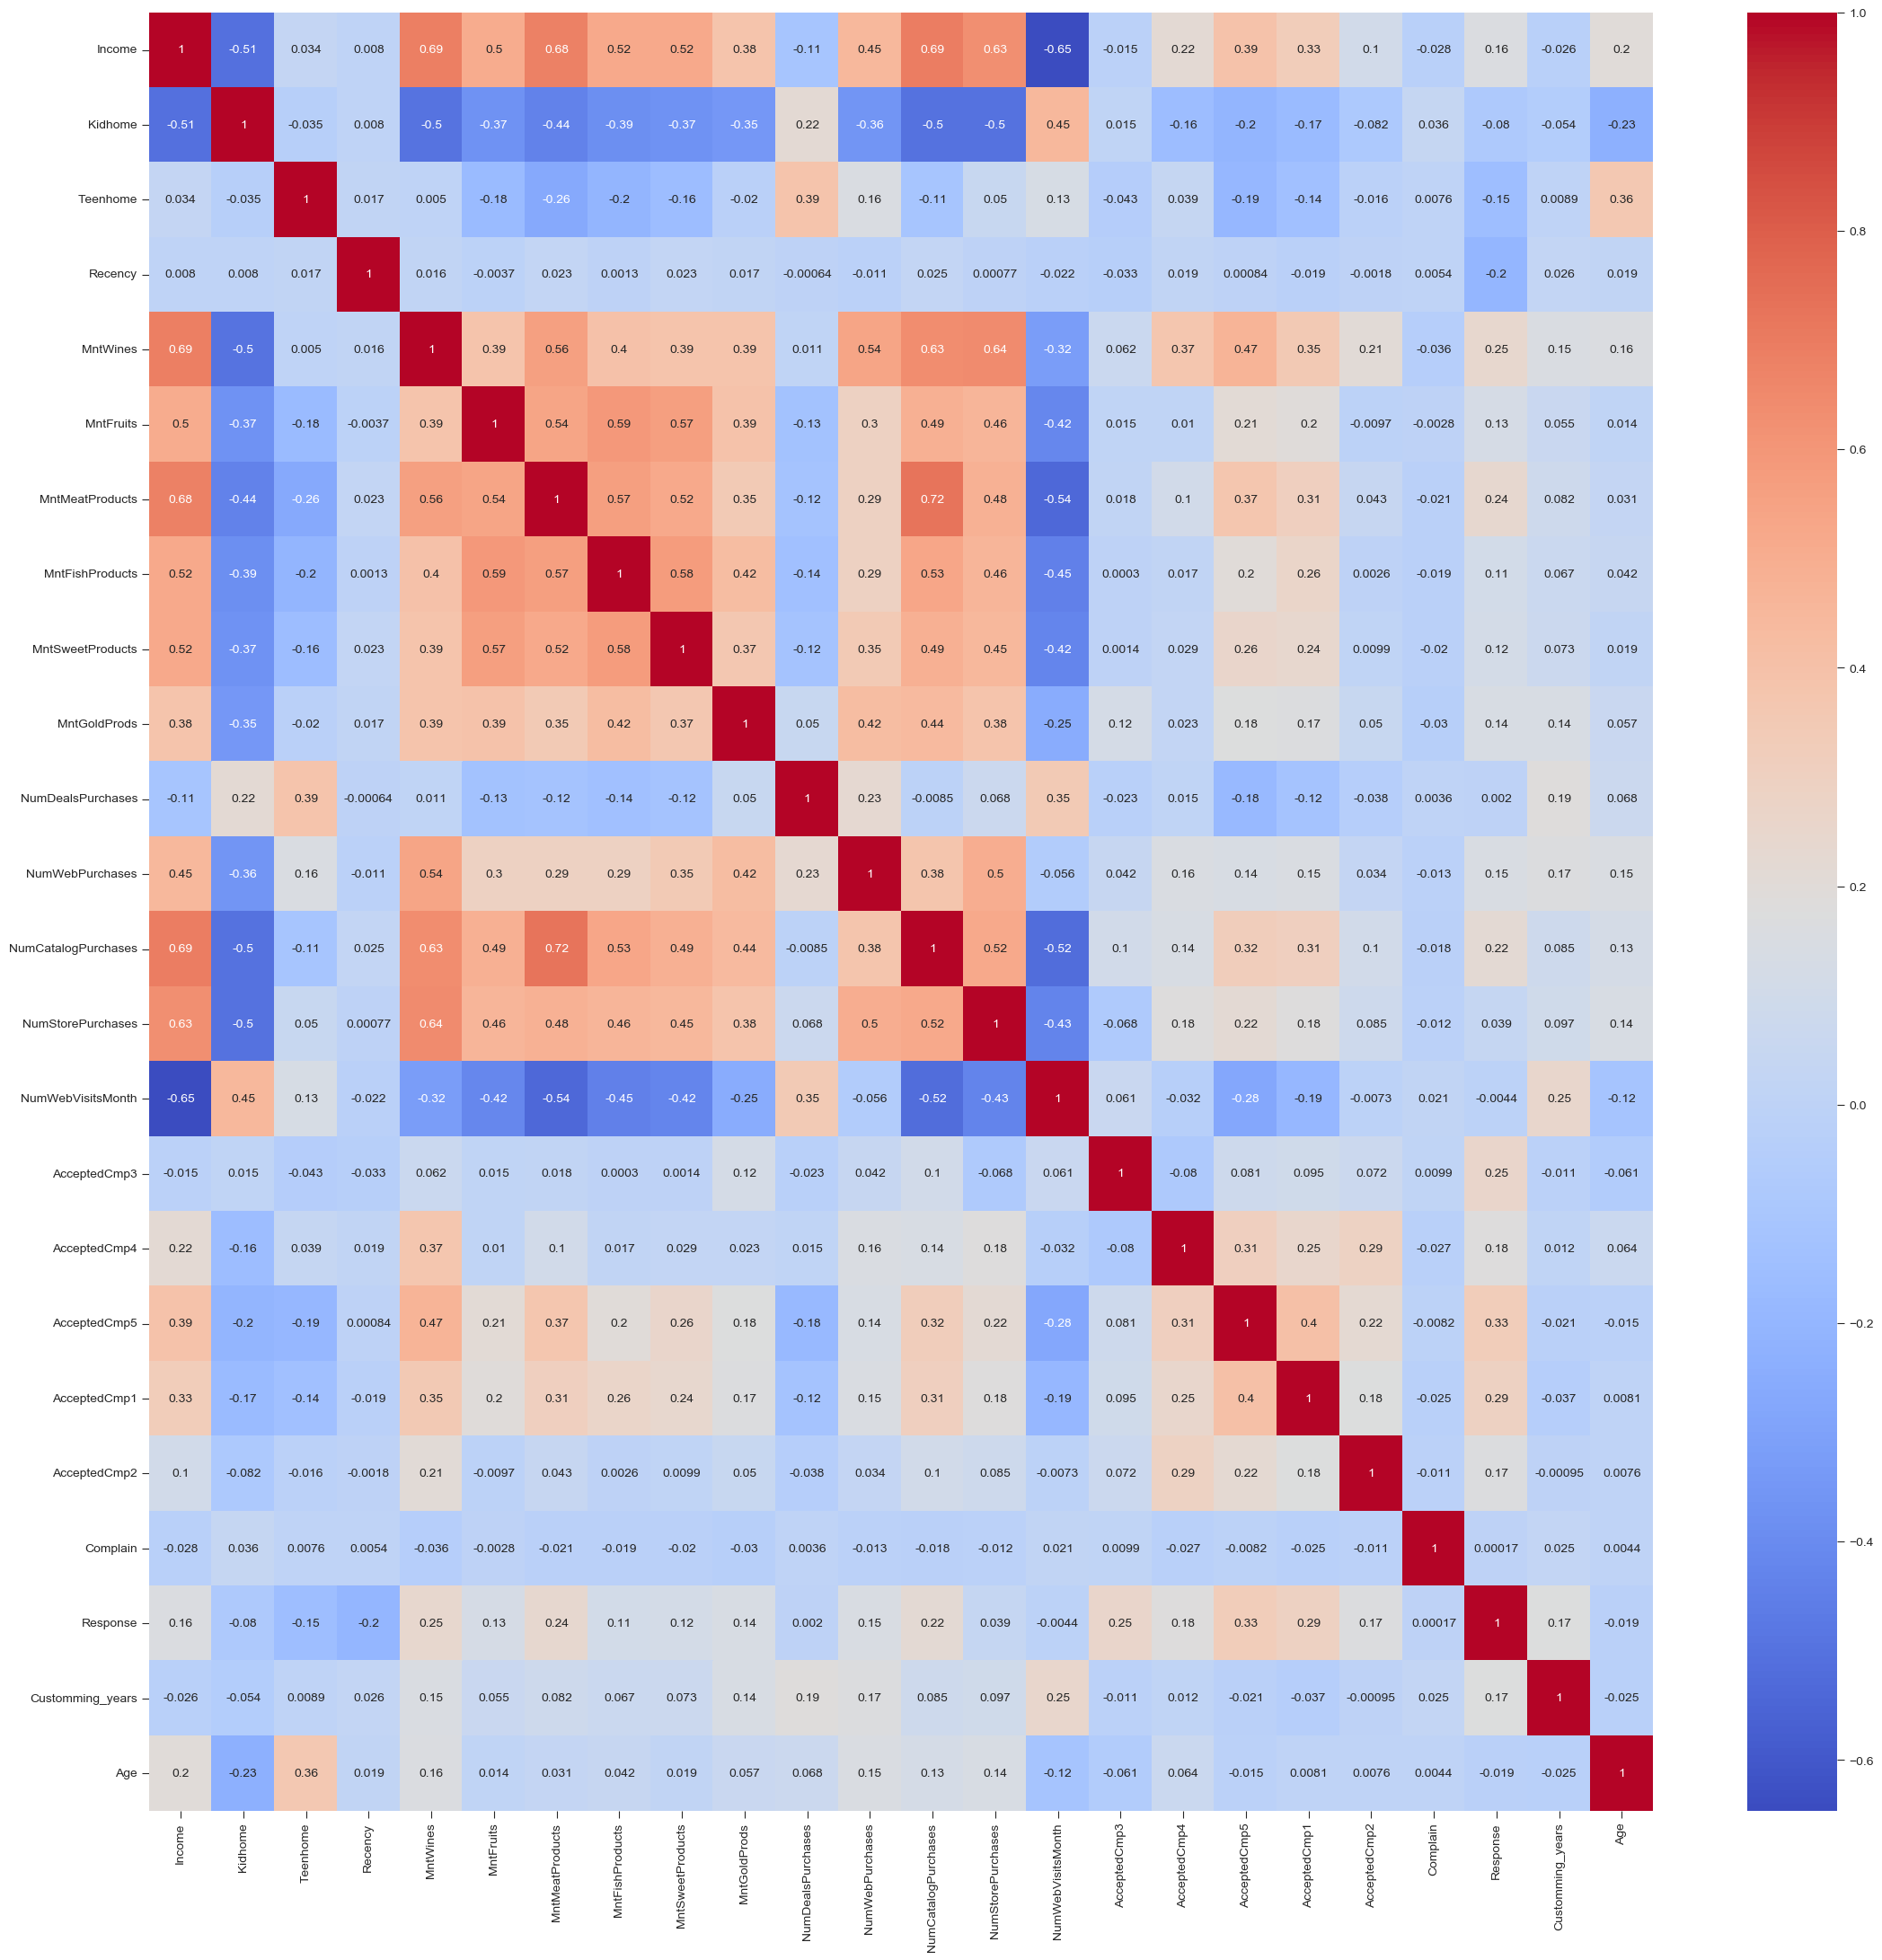

In [78]:
cor = data.corr()
plt.figure(figsize = (27,26))
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

Taking into consideration the previous charts and a heatmap, we can select the following features:

In [80]:
manually_selected_columns = ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts', 'Income',
                             'NumCatalogPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                             'Customming_years']

In [81]:
manually_selected_data = data[manually_selected_columns]
manually_selected_data['Response'] = data['Response']
manually_selected_data.head(10)

D:\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,Income,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Customming_years,Response
0,0.0,0.0,0.585859,0.425318,0.316522,0.357999,0.357143,0.0,0.0,0.0,0.0,1.000000,1
1,0.5,0.5,0.383838,0.007368,0.003478,0.285375,0.035714,0.0,0.0,0.0,0.0,0.333333,0
2,0.0,0.0,0.262626,0.285332,0.073623,0.440975,0.071429,0.0,0.0,0.0,0.0,0.666667,0
3,0.5,0.0,0.262626,0.007368,0.011594,0.164079,0.000000,0.0,0.0,0.0,0.0,0.333333,0
4,0.5,0.0,0.949495,0.115874,0.068406,0.358954,0.107143,0.0,0.0,0.0,0.0,0.333333,0
5,0.0,0.5,0.161616,0.348292,0.056812,0.384939,0.142857,0.0,0.0,0.0,0.0,0.666667,0
6,0.0,0.5,0.343434,0.157401,0.095072,0.342586,0.107143,0.0,0.0,0.0,0.0,1.000000,0
7,0.5,0.0,0.323232,0.050904,0.032464,0.206001,0.000000,0.0,0.0,0.0,0.0,0.666667,0
8,0.5,0.0,0.191919,0.009377,0.013913,0.186894,0.000000,0.0,0.0,0.0,0.0,0.666667,1
9,0.5,0.5,0.686869,0.018754,0.003478,0.034779,0.000000,1.0,0.0,0.0,0.0,0.333333,0


We will write manually selected data to the appropriate csv file

In [82]:
from pathlib import Path  
filepath = Path('data/manually_selected_data.csv')   
manually_selected_data.to_csv(filepath, index=False)  

The same we will do with the whole dataset partially preprocessed

In [83]:
from pathlib import Path  
filepath = Path('data/preprocessed_data.csv')   
data.to_csv(filepath, index=False)  

Let's create dat frame selector

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

We will define preprocessing with special pipelines for numerical and categorical values

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(numerical_columns)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(categorical_columns)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

In [38]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

### Devide our dataset for data and target

In [39]:
X = data.drop(['Response'], axis=1)
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customming_years,Age
0,Graduation,Single,0.357999,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.792683
1,Graduation,Single,0.285375,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.829268
2,Graduation,Together,0.440975,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.695122
3,Graduation,Together,0.164079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.463415
4,PhD,Married,0.358954,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0.376996,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.307692,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.670732
2236,PhD,Together,0.394182,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.384615,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.926829
2237,Graduation,Divorced,0.350875,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,...,1.000000,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.500000
2238,Master,Together,0.426393,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,...,0.769231,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.804878


In [40]:
y = data['Response'].values
y

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

### Devide our dataset for test and train sets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [42]:
num_pipeline.fit_transform(X_train)

array([[0.21210367, 0.        , 0.        , ..., 0.        , 0.66666667,
        0.5       ],
       [0.3573034 , 0.        , 0.5       , ..., 0.        , 0.66666667,
        0.52439024],
       [0.34562831, 0.        , 0.5       , ..., 0.        , 0.66666667,
        0.84146341],
       ...,
       [0.46739164, 0.        , 0.5       , ..., 0.        , 0.66666667,
        0.86585366],
       [0.28801025, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.57317073],
       [0.21672814, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.46341463]])

In [43]:
cat_pipeline.fit_transform(X_train)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

## Feature selection with RandomForest

In [44]:
tmp_data = data.copy() # leave for clustering 

tmp_data['Education'] = tmp_data['Education'].replace(['Basic'], 0)
tmp_data['Education'] = tmp_data['Education'].replace(['Bachelor'], 1)
tmp_data['Education'] = tmp_data['Education'].replace(['Master'], 2)
tmp_data['Education'] = tmp_data['Education'].replace(['PhD'], 3)

# Change Marital_Status to dummies
tmp_data = pd.get_dummies(tmp_data)
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2236 non-null   float64
 1   Kidhome                  2236 non-null   float64
 2   Teenhome                 2236 non-null   float64
 3   Recency                  2236 non-null   float64
 4   MntWines                 2236 non-null   float64
 5   MntFruits                2236 non-null   float64
 6   MntMeatProducts          2236 non-null   float64
 7   MntFishProducts          2236 non-null   float64
 8   MntSweetProducts         2236 non-null   float64
 9   MntGoldProds             2236 non-null   float64
 10  NumDealsPurchases        2236 non-null   float64
 11  NumWebPurchases          2236 non-null   float64
 12  NumCatalogPurchases      2236 non-null   float64
 13  NumStorePurchases        2236 non-null   float64
 14  NumWebVisitsMonth       

In [45]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

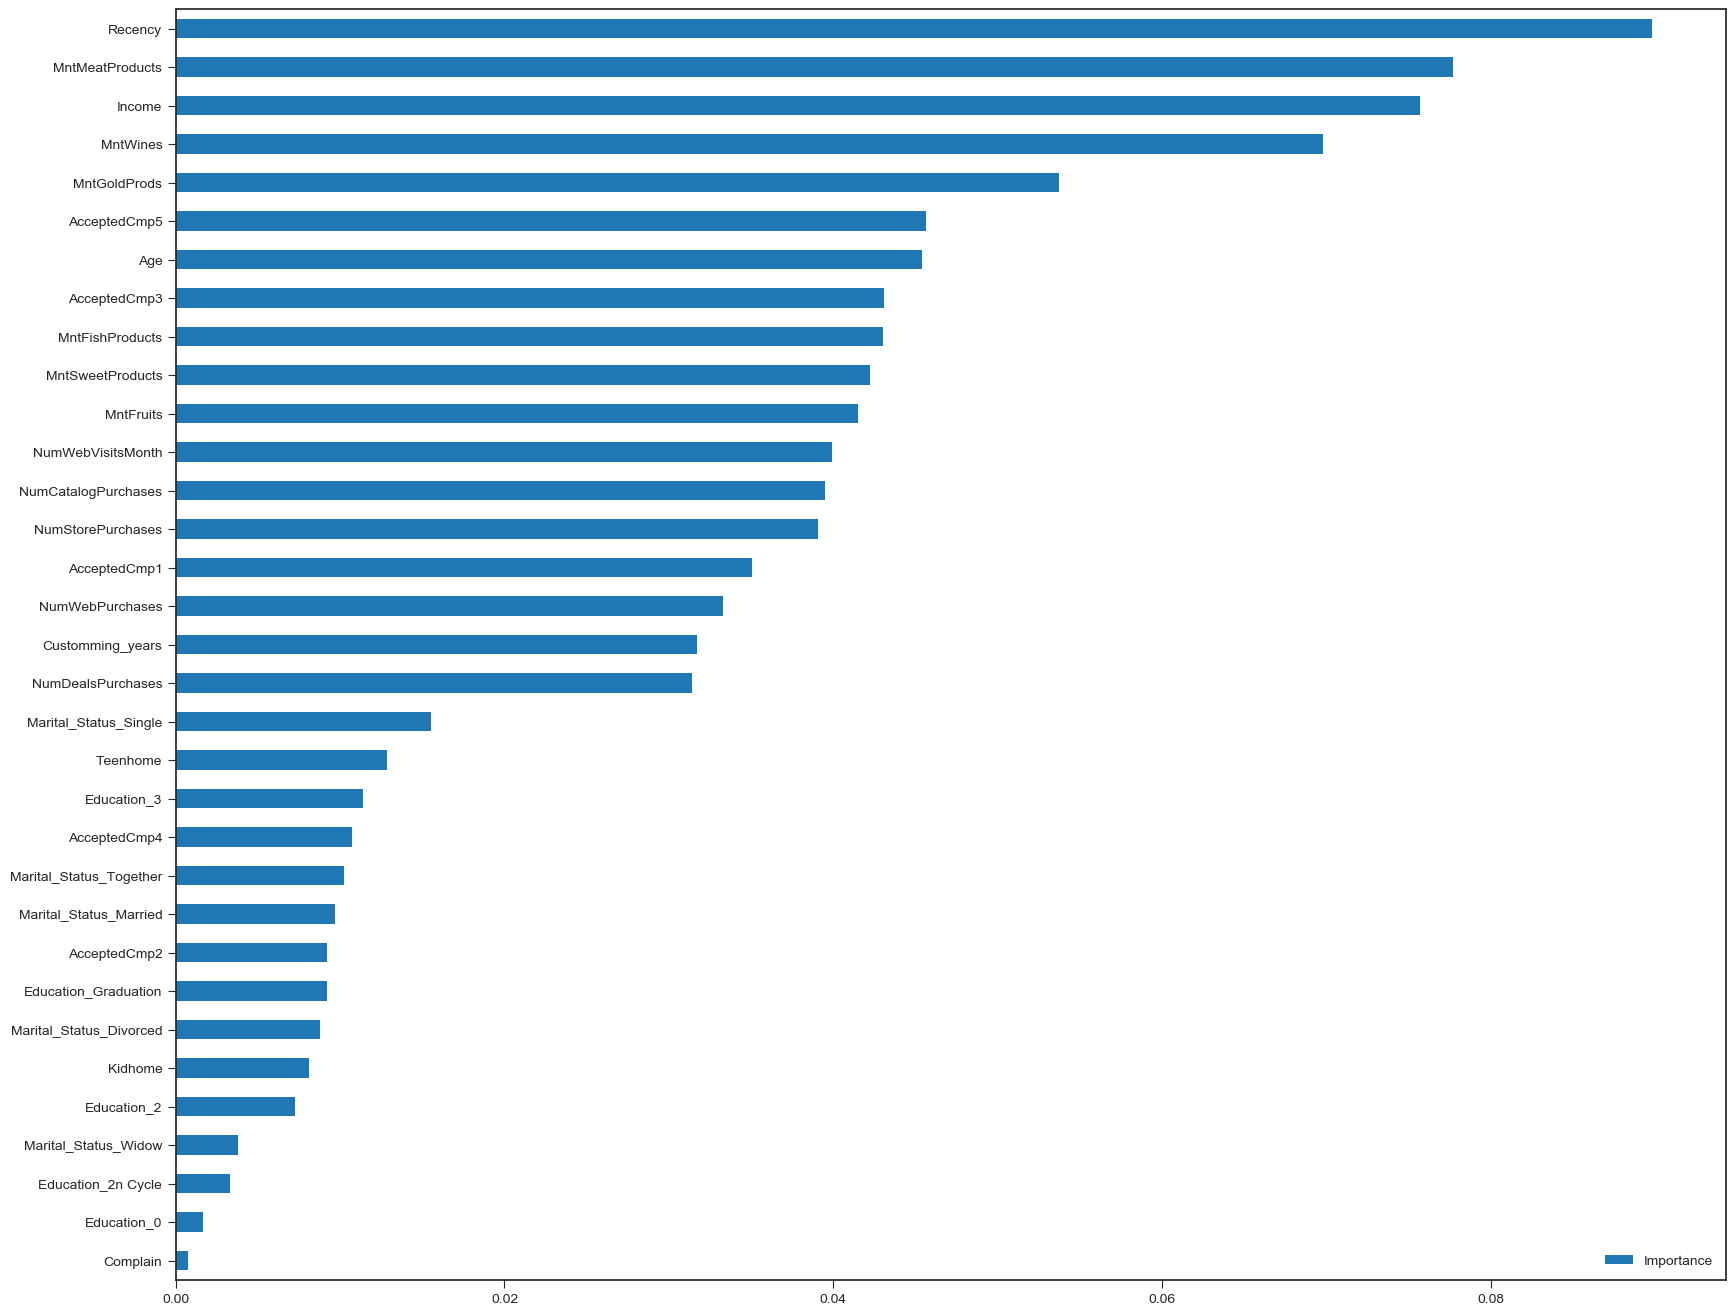

In [46]:
# Using Random Forest to gain an insight on Feature Importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(tmp_data.drop('Response', axis=1), tmp_data['Response'])

plt.style.use('seaborn-ticks')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=tmp_data.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

Stwórzmy dataframe automatycznie wyznaczonych cech

In [69]:
atomatically_selected_data_columns = importance.sort_values(by='Importance', ascending=False).head(13).index
atomatically_selected_data = data[atomatically_selected_data_columns]
atomatically_selected_data['Response'] = data['Response']

atomatically_selected_data.head(13)

D:\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Recency,MntMeatProducts,Income,MntWines,MntGoldProds,AcceptedCmp5,Age,AcceptedCmp3,MntFishProducts,MntSweetProducts,MntFruits,NumWebVisitsMonth,NumCatalogPurchases,Response
0,0.585859,0.316522,0.357999,0.425318,0.243094,0.0,0.792683,0.0,0.664093,0.334601,0.442211,0.35,0.357143,1
1,0.383838,0.003478,0.285375,0.007368,0.016575,0.0,0.829268,0.0,0.007722,0.003802,0.005025,0.25,0.035714,0
2,0.262626,0.073623,0.440975,0.285332,0.116022,0.0,0.695122,0.0,0.428571,0.079848,0.246231,0.20,0.071429,0
3,0.262626,0.011594,0.164079,0.007368,0.013812,0.0,0.463415,0.0,0.038610,0.011407,0.020101,0.30,0.000000,0
4,0.949495,0.068406,0.358954,0.115874,0.041436,0.0,0.500000,0.0,0.177606,0.102662,0.216080,0.25,0.107143,0
5,0.161616,0.056812,0.384939,0.348292,0.038674,0.0,0.670732,0.0,0.000000,0.159696,0.211055,0.30,0.142857,0
6,0.343434,0.095072,0.342586,0.157401,0.074586,0.0,0.621951,0.0,0.193050,0.186312,0.326633,0.30,0.107143,0
7,0.323232,0.032464,0.206001,0.050904,0.063536,0.0,0.451220,0.0,0.011583,0.003802,0.050251,0.40,0.000000,0
8,0.191919,0.013913,0.186894,0.009377,0.005525,0.0,0.585366,0.0,0.011583,0.011407,0.000000,0.45,0.000000,1
9,0.686869,0.003478,0.034779,0.018754,0.035912,0.0,0.878049,1.0,0.003861,0.003802,0.000000,1.00,0.000000,0


Zapiszmy automatycznie wyznaczone cechy do oddzielnego pliku

In [70]:
from pathlib import Path  
filepath = Path('data/atomatically_selected_data.csv')   
atomatically_selected_data.to_csv(filepath, index=False)  

### Sieci neuronowe 

In [50]:
X_train2 = preprocess_pipeline.transform(X_train)
X_test2 = preprocess_pipeline.transform(X_test)

In [51]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [52]:
model_1 = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_train2.shape[1], )),
              Dense(50, activation='relu', name="1nd_layer"),
              Dense(20, activation='relu', name="2nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1")

model_1.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [53]:
history_1 = model_1.fit(X_train2, y_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_test2, y_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7712 - val_loss: 0.3672 - val_accuracy: 0.8644
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8505 - val_loss: 0.2869 - val_accuracy: 0.8987
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8754 - val_loss: 0.2553 - val_accuracy: 0.9136
Epoch 4/100
49/49 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8812 - val_loss: 0.2472 - val_accuracy: 0.9046
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8888 - val_loss: 0.2300 - val_accuracy: 0.9121
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8875 - val_loss: 0.2247 - val_accuracy: 0.9061
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8946 - val_loss: 0.2312 - val_accuracy: 0.9136
Epoch 8/100
4

Epoch 59/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9776 - val_loss: 0.5792 - val_accuracy: 0.8599
Epoch 60/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9725 - val_loss: 0.4759 - val_accuracy: 0.8823
Epoch 61/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.5168 - val_accuracy: 0.8763
Epoch 62/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9725 - val_loss: 0.4963 - val_accuracy: 0.8942
Epoch 63/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9789 - val_loss: 0.4837 - val_accuracy: 0.8912
Epoch 64/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9827 - val_loss: 0.4969 - val_accuracy: 0.8942
Epoch 65/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9802 - val_loss: 0.5088 - val_accuracy: 0.8927
Epoch 

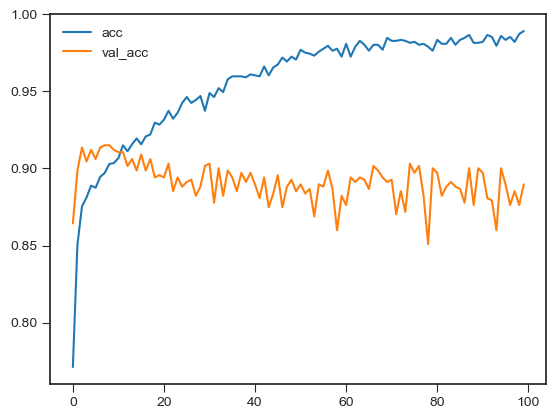

In [54]:
plt.plot(pd.DataFrame(history_1.history['accuracy']), label='acc')
plt.plot(pd.DataFrame(history_1.history['val_accuracy']), label='val_acc')

plt.legend()
plt.show()